<a href="https://colab.research.google.com/gist/chistachill/fb541251d57224a986afc7ad54679d0f/untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лаборторная работа №5
##Сжатие картинок с помощью SVD разложения
### Попова Елизавета Сергеевна, НММбд-01-22

In [ ]:
import numpy as np
from PIL import Image

# Преобразование из PIL в Numpy Array
img = Image.open('garik_do.jpg')
x = np.array(img)

# Создание функции для сжатия картинки
def reduce_rank(U, S, Vt, r):
    y_r = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    y_r[y_r > 255] = 255
    y_r[y_r < 0] = 0
    img_y_r = np.asarray(y_r, dtype=np.uint8)
    return img_y_r

#Cоздаем цикл для прохождения сингулярных значений, преобразуем матрицу, соединяем все цвета вместе и сохраняем
r_values = [1, 2, 10, 30, 100]

for r in r_values:
  U, S, Vt = np.linalg.svd(x[:, :, 0], full_matrices=False)
  img_y_red = reduce_rank(U, S, Vt, r)

  U, S, Vt = np.linalg.svd(x[:, :, 1], full_matrices=False)
  img_y_green = reduce_rank(U, S, Vt, r)

  U, S, Vt = np.linalg.svd(x[:, :, 2], full_matrices=False)
  img_y_blue = reduce_rank(U, S, Vt, r)

  y = np.concatenate(
    (img_y_red[:, :, np.newaxis], img_y_green[:, :, np.newaxis], img_y_blue[:, :, np.newaxis]), axis=2)

  Image.fromarray(y).save(f'{r}garik_posle.jpg')




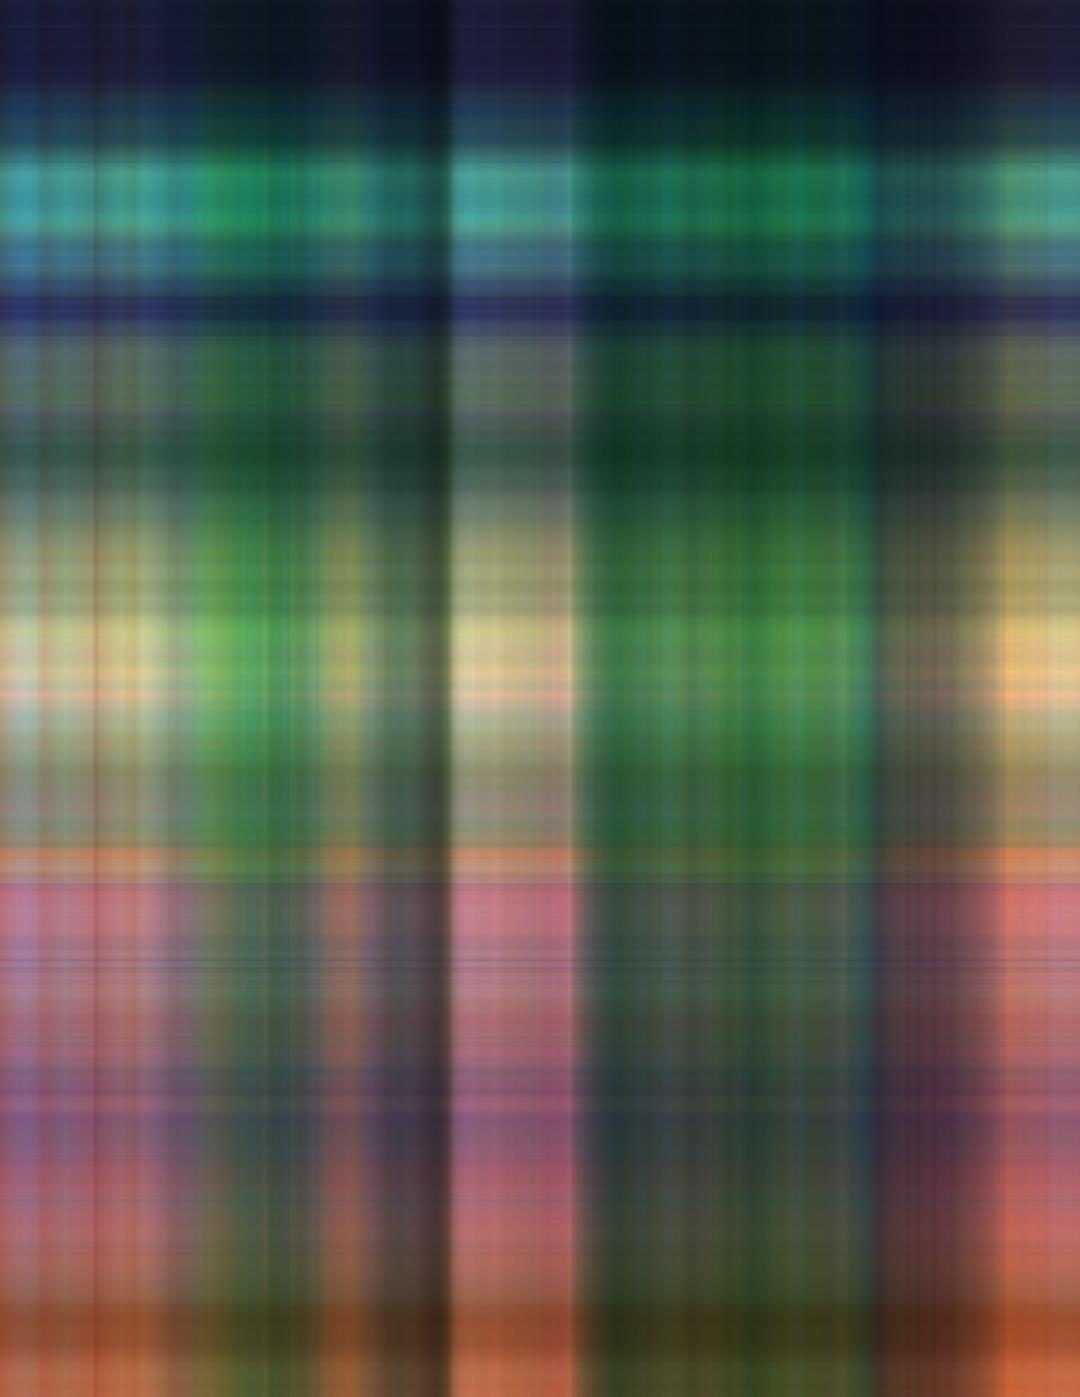

In [21]:
img1 = Image.open('1garik_posle.jpg')
img1

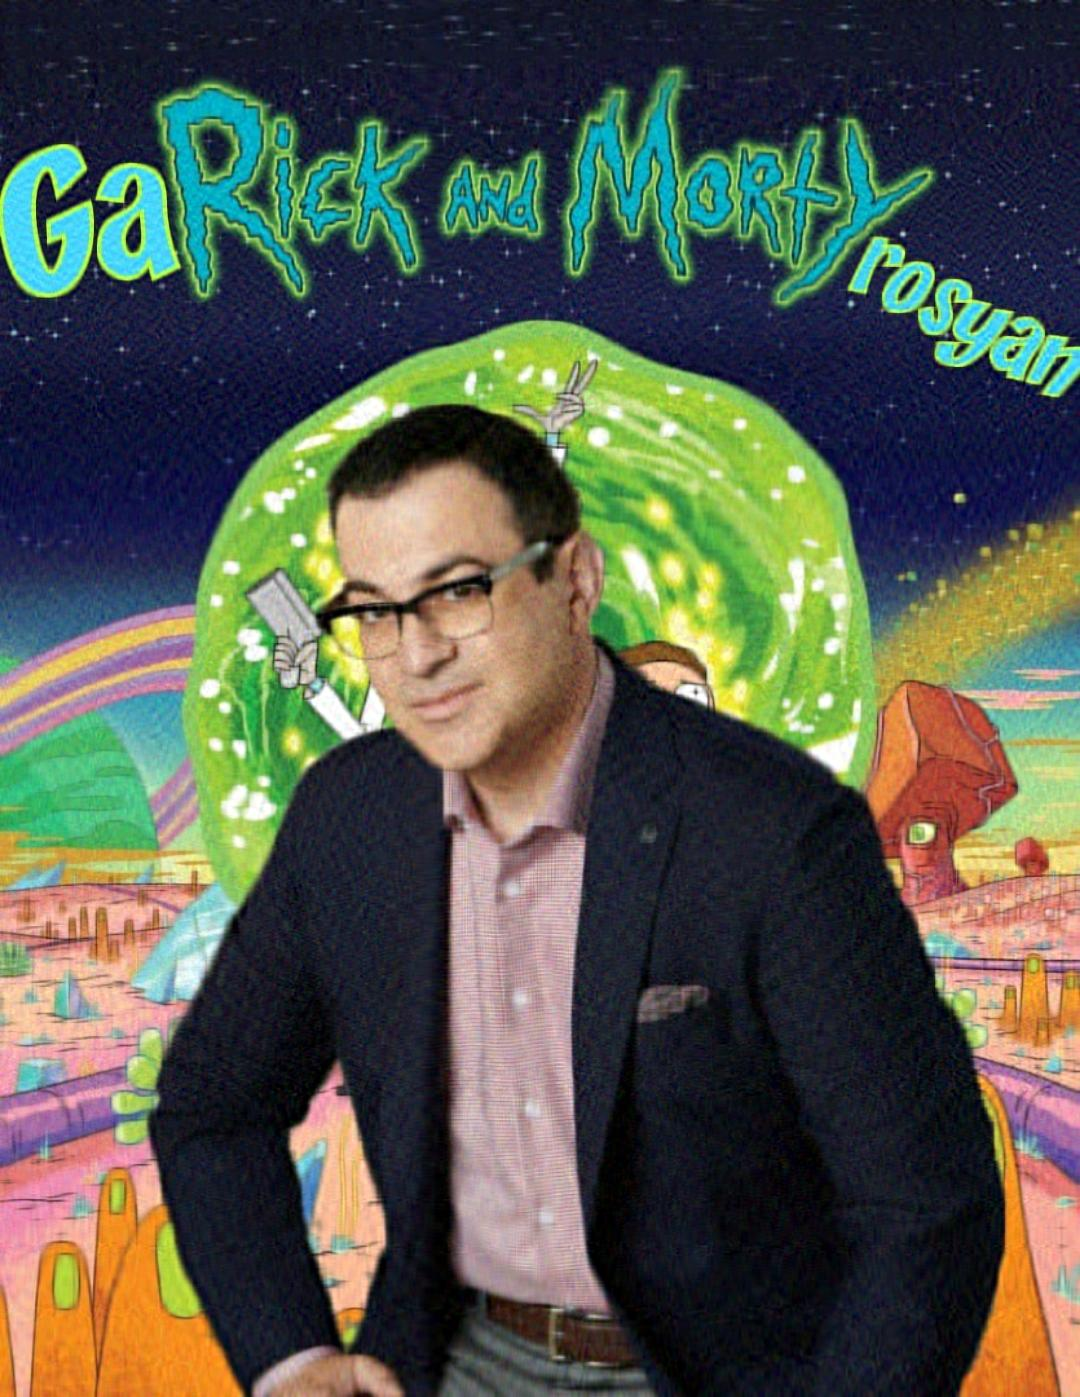

In [22]:
img2 = Image.open('100garik_posle.jpg')
img2

In [ ]:
import numpy as np
from PIL import Image

# Преобразование из PIL в Numpy Array
img = Image.open('klass_do.jpg')
x = np.array(img)

# Создание функции для сжатия картинки
def reduce_rank(U, S, Vt, r):
    y_r = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    y_r[y_r > 255] = 255
    y_r[y_r < 0] = 0
    img_y_r = np.asarray(y_r, dtype=np.uint8)
    return img_y_r

#Cоздаем цикл для прохождения сингулярных значений, преобразуем матрицу, соединяем все цвета вместе и сохраняем
r_values = [1, 2, 10, 30, 100]

for r in r_values:
  U, S, Vt = np.linalg.svd(x[:, :, 0], full_matrices=False)
  img_y_red = reduce_rank(U, S, Vt, r)

  U, S, Vt = np.linalg.svd(x[:, :, 1], full_matrices=False)
  img_y_green = reduce_rank(U, S, Vt, r)

  U, S, Vt = np.linalg.svd(x[:, :, 2], full_matrices=False)
  img_y_blue = reduce_rank(U, S, Vt, r)

  y = np.concatenate(
    (img_y_red[:, :, np.newaxis], img_y_green[:, :, np.newaxis], img_y_blue[:, :, np.newaxis]), axis=2)

  Image.fromarray(y).save(f'{r}klass_posle.jpg')

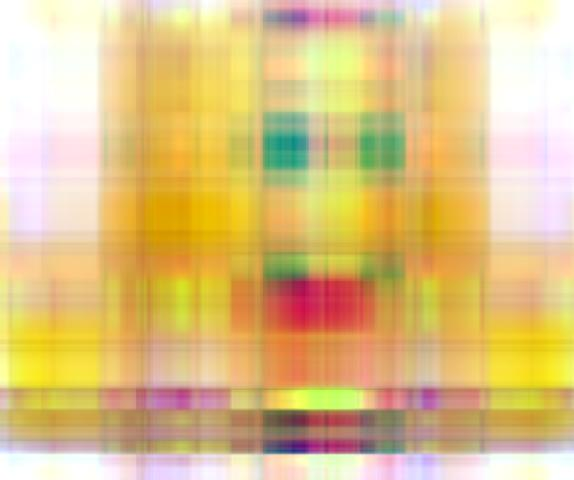

In [25]:
img3 = Image.open('2klass_posle.jpg')
img3

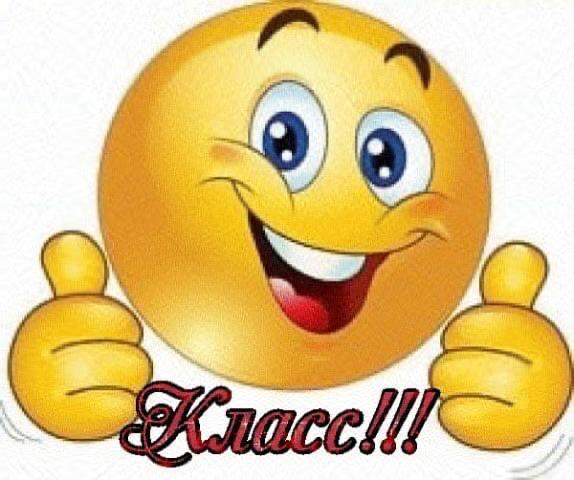

In [26]:
img4 = Image.open('100klass_posle.jpg')
img4

In [ ]:
import numpy as np
from PIL import Image

# Преобразование из PIL в Numpy Array
img = Image.open('echpochmaki_do.jpg')
x = np.array(img)

# Создание функции для сжатия картинки
def reduce_rank(U, S, Vt, r):
    y_r = U[:, :r] @ np.diag(S[:r]) @ Vt[:r, :]
    y_r[y_r > 255] = 255
    y_r[y_r < 0] = 0
    img_y_r = np.asarray(y_r, dtype=np.uint8)
    return img_y_r

#Cоздаем цикл для прохождения сингулярных значений, преобразуем матрицу, соединяем все цвета вместе и сохраняем
r_values = [1, 2, 10, 30, 100]

for r in r_values:
  U, S, Vt = np.linalg.svd(x[:, :, 0], full_matrices=False)
  img_y_red = reduce_rank(U, S, Vt, r)

  U, S, Vt = np.linalg.svd(x[:, :, 1], full_matrices=False)
  img_y_green = reduce_rank(U, S, Vt, r)

  U, S, Vt = np.linalg.svd(x[:, :, 2], full_matrices=False)
  img_y_blue = reduce_rank(U, S, Vt, r)

  y = np.concatenate(
    (img_y_red[:, :, np.newaxis], img_y_green[:, :, np.newaxis], img_y_blue[:, :, np.newaxis]), axis=2)

  Image.fromarray(y).save(f'{r}echpochmaki_posle.jpg')

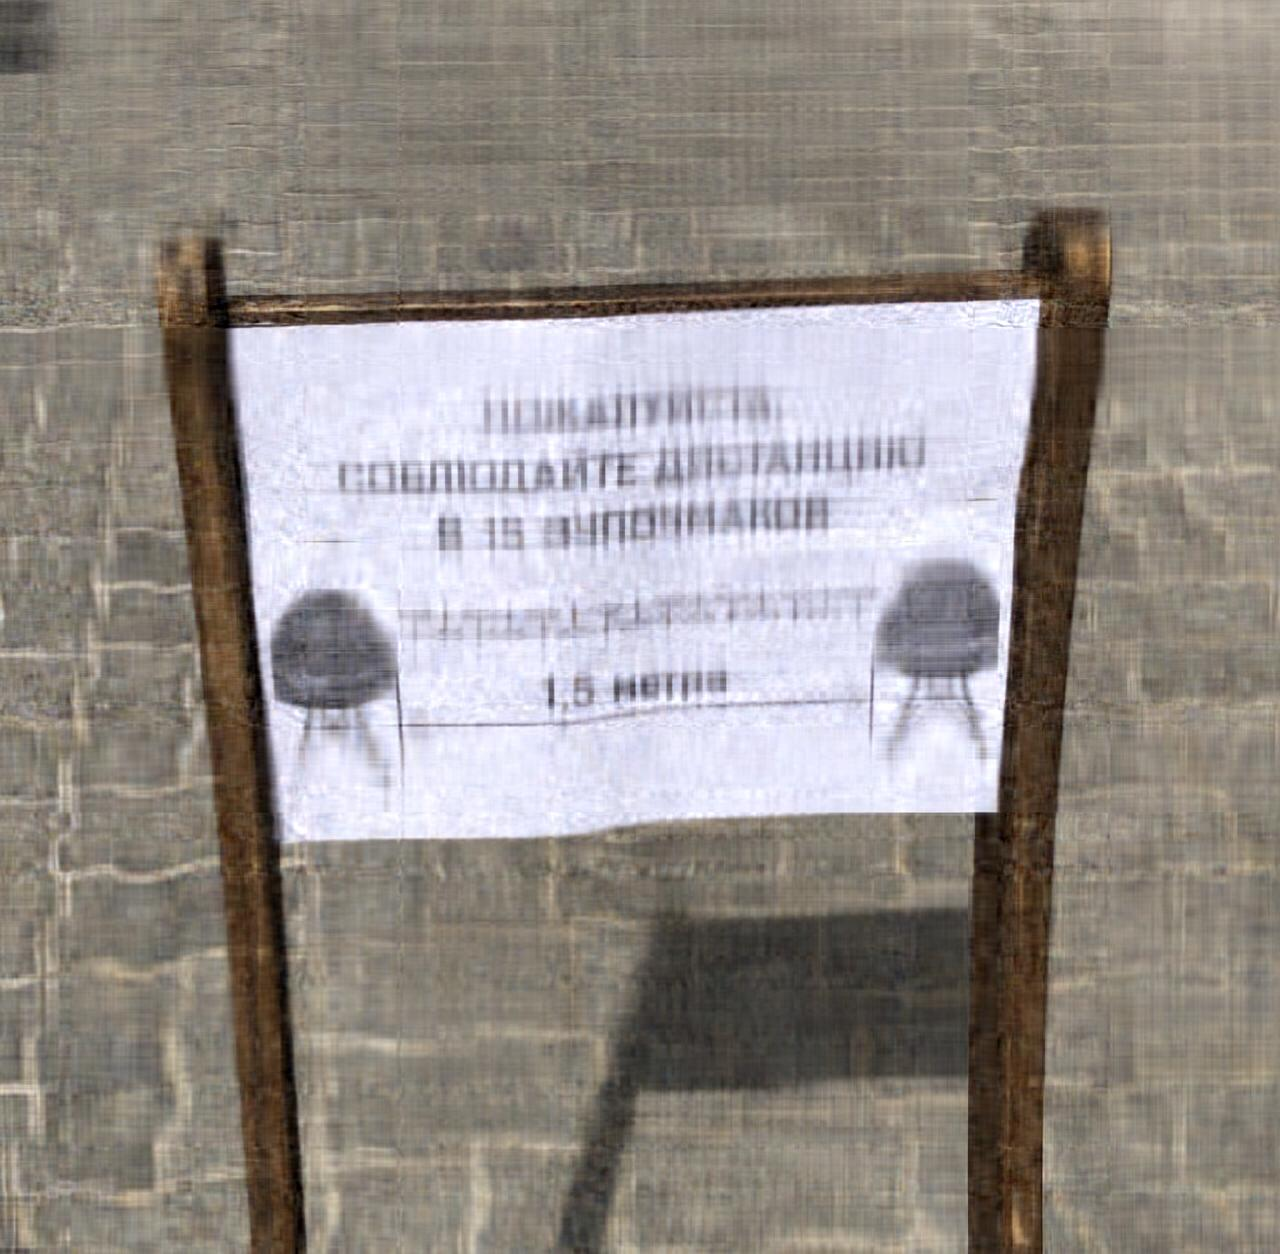

In [27]:
img5 = Image.open('30echpochmaki_posle.jpg')
img5

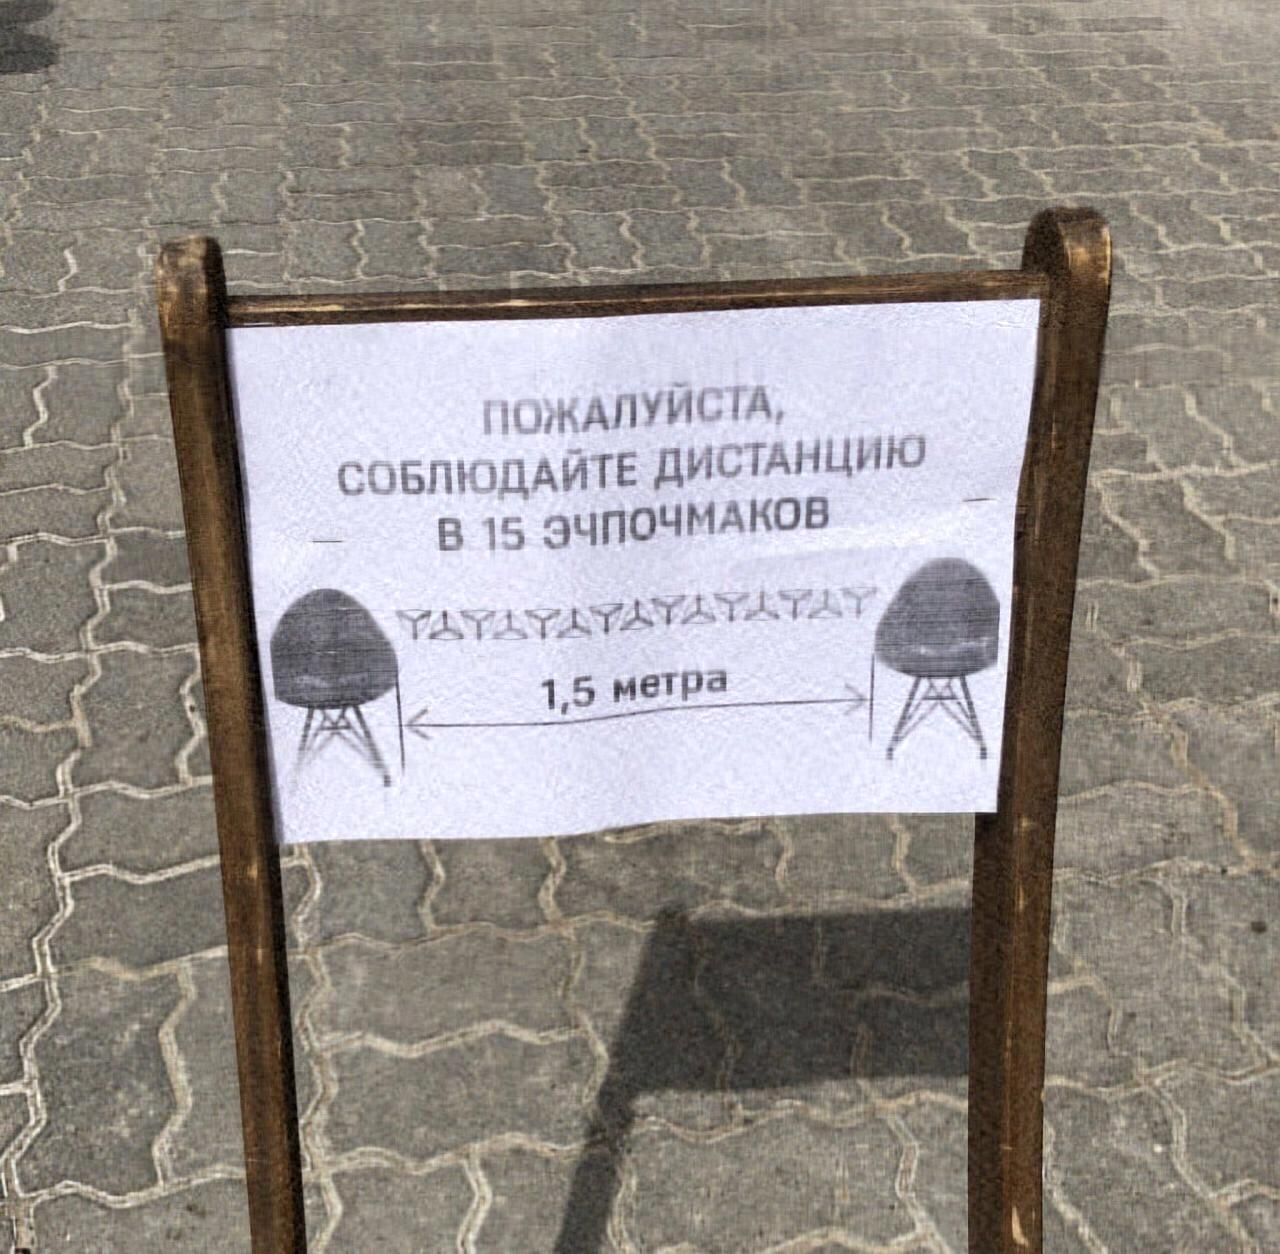

In [28]:
img6 = Image.open('100echpochmaki_posle.jpg')
img6

### Я решила не добавлять все картинки, но если вам будет интересно, сможете найти их на моем гитхабе

## Сравнение байтов

Для картинки "класс" значение килобайтов изменилось с 85 до 41
Для картинки "гарик" значение поменялось с 498 килобайт до 208
Для картинки "эчпочмаки" значение поменялось с 471 килобайта до 221

В среднем вес каждой картинк  уменьшился в 2 раза, что очень неплохой результат!

Я рассматривала только картиночки с сингулярными значениями 100 и изначальные, у других значения килобайт сильно меньше. В среднем, разница значений у картинки с сингулярным значением 1 и с сингулярным значением 100 равна 3.